### Make sure the dependecies are actually installed

In [1]:
!pip install ifcopenshell
!pip install numpy
# PyMesh installed using pip is invlaid, use the official website:
# https://pymesh.readthedocs.io/en/latest/index.html

Let's start with loading our dependencies and opening our file

In [2]:
import ifcopenshell
import ifcopenshell.util.placement

model = ifcopenshell.open('./atlas_8_floor.ifc')

Extract all IFC COLUMNS from the IFC file and plot their "local_placement"

In [3]:
import numpy as np
import matplotlib.pyplot as plt

walls = model.by_type('IFCWALL')
cols = model.by_type('IFCCOLUMN')
    

Extract a representation of our mesh for a single collumn

In [4]:
import ifcopenshell.geom


settings = ifcopenshell.geom.settings()

shapeC = []
TcC = []
facesC = []
edgesC = []
vertsC = []

for i in range(len(cols)):
    shapeC.append(ifcopenshell.geom.create_shape(settings, cols[i]))
    T_col = shapeC[i].transformation.matrix.data
    TcC.append(np.reshape(T_col, (4,3)).T)

    facesC.append(shapeC[i].geometry.faces)
    edgesC.append(shapeC[i].geometry.edges)
    vertsC.append(shapeC[i].geometry.verts)

shapeW = []
TcW = []
facesW = []
edgesW = []
vertsW = []

for i in range(len(walls)):
    shapeW.append(ifcopenshell.geom.create_shape(settings, walls[i]))
    T_col = shapeW[i].transformation.matrix.data
    TcW.append(np.reshape(T_col, (4,3)).T)

    facesW.append(shapeW[i].geometry.faces)
    edgesW.append(shapeW[i].geometry.edges)
    vertsW.append(shapeW[i].geometry.verts)

Use pymesh as our geometry processing library, so let's import it into the proper datatype

In [5]:
import pymesh

grouped_vertsC = []
grouped_facesC = []
meshC = []

for j in range(len(cols)):
    grouped_vertsC.append(np.array([[vertsC[j][i], vertsC[j][i + 1], vertsC[j][i + 2]] for i in range(0, len(vertsC[j]), 3)]))
    grouped_facesC.append(np.array([[facesC[j][i], facesC[j][i + 1], facesC[j][i + 2]] for i in range(0, len(facesC[j]), 3)]))

    meshC.append(pymesh.form_mesh(grouped_vertsC[j], grouped_facesC[j]))

grouped_vertsW = []
grouped_facesW = []
meshW = []

for j in range(len(walls)):
    grouped_vertsW.append(np.array([[vertsW[j][i], vertsW[j][i + 1], vertsW[j][i + 2]] for i in range(0, len(vertsW[j]), 3)]))
    grouped_facesW.append(np.array([[facesW[j][i], facesW[j][i + 1], facesW[j][i + 2]] for i in range(0, len(facesW[j]), 3)]))

    meshW.append(pymesh.form_mesh(grouped_vertsW[j], grouped_facesW[j]))

Make sure we've done our work correctly, export to stl. And view in commonly available tools (for instance, blender, only shown here)

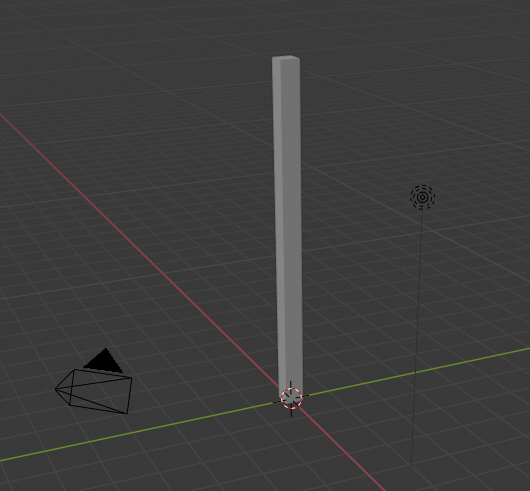

In [6]:
#for j in range(len(cols)):
    #pymesh.save_mesh("column" + str(j) + ".stl",mesh[j])

Slice our mesh

In [7]:
## Slice mesh syntax (the mesh to slice, the direction in which to slice, amount of slices)
# If you go into the source code (pymesh is open source), it's quite easy to figure out how it works and write you own custom slicer which is able to slice at a specified 
meshesC = []

for j in range(len(cols)):
    meshesC.append(pymesh.slice_mesh(meshC[j], [0,0,1], 3))

meshesW = []

for j in range(len(walls)):
    meshesW.append(pymesh.slice_mesh(meshW[j], [0,0,1], 3))

Then use shapely to visualize our (flat) mesh

In [8]:
from shapely.geometry import Polygon
import geopandas as gpd

#slice = []
#vs = []
#fs = []

#for j in range(len(cols)):
    #slice.append(meshes[j][25]) # Let's take one of our slices

    #vs.append(slice[j].vertices)     #[x, y, z] of the vertex
    #fs.append(slice[j].faces)        #index of the vertices of the faces

#for i, f in enumerate(fs0):
   # p = [] # we are going to store our polygon in here
    #for idx in f:
        #p.append((vs0[idx][0], vs0[idx][1]))

    #pplot = Polygon(p)
    #x,y = pplot.exterior.xy 
    ## Notice that we are actually plotting the vertices and not the faces of the polygon,
    # There probably is a better more elegant way to do this.
    #plt.plot(x,y )   
    # Furthremore notice that all meshes are expressed without the transformation we've extracted earlier

#for i, f in enumerate(fs1):
    #for idx in f:
        #p.append((vs1[idx][0], vs1[idx][1]))

    #pplot = Polygon(p)
    #x,y = pplot.exterior.xy 
    ## Notice that we are actually plotting the vertices and not the faces of the polygon,
    # There probably is a better more elegant way to do this.
    #plt.plot(x,y )   
    # Furthremore notice that all meshes are expressed without the transformation we've extracted earlier

#ax = plt.gca()
#ax.set_aspect('equal', adjustable='box')

Example how we could transform the slice into map frame

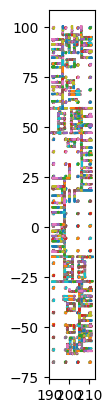

In [9]:
sliceC = []
vsC = []
fsC = []

sliceW = []
vsW = []
fsW = []

for j in range(len(cols)):
    sliceC.append(meshesC[j][0]) # Let's take one of our slices

    vsC.append(sliceC[j].vertices)     #[x, y, z] of the vertex
    fsC.append(sliceC[j].faces)        #index of the vertices of the faces

    for i, f in enumerate(fsC[j]):
        p = [] # we are going to store our polygon in here
        for idx in f:
            hom_coord = [vsC[j][idx][0],vsC[j][idx][1],0,1]
            hom_coord_map = TcC[j]@hom_coord

            p.append((hom_coord_map[0], hom_coord_map[1]))

        pplot = Polygon(p)
        x,y = pplot.exterior.xy 

        xmap = []
        ymap = []


    ## Notice that we are actually plotting the vertices and not the faces of the polygon,
    # There probably is a better more elegant way to do this.
        plt.plot(x,y ) 

for j in range(len(walls)):
    sliceW.append(meshesW[j][0]) # Let's take one of our slices

    vsW.append(sliceW[j].vertices)     #[x, y, z] of the vertex
    fsW.append(sliceW[j].faces)        #index of the vertices of the faces

    for i, f in enumerate(fsW[j]):
        p = [] # we are going to store our polygon in here
        for idx in f:
            hom_coord = [vsW[j][idx][0],vsW[j][idx][1],0,1]
            hom_coord_map = TcW[j]@hom_coord

            p.append((hom_coord_map[0], hom_coord_map[1]))

        pplot = Polygon(p)
        x,y = pplot.exterior.xy 

        xmap = []
        ymap = []


    ## Notice that we are actually plotting the vertices and not the faces of the polygon,
    # There probably is a better more elegant way to do this.
        plt.plot(x,y ) 

ax = plt.gca()
ax.set_aspect('equal', adjustable='box') 